# Homework 1
Nahum Tilahun |
Student ID: 1620183 |
EE 440

In [49]:
#import cell
import numpy as np
import os
os.sys.path
import cv2
from skimage import color
import matplotlib.pyplot as plt

### Problem 2

uint8
255
0


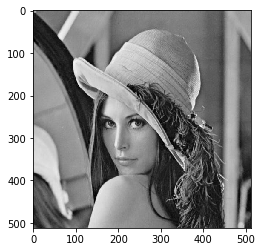

In [50]:
#a
image = cv2.imread('1_4.bmp')

#b
data = image.dtype
imax = np.amax(image)
imin = np.amin(image)
print(data)
print(imax)
print(imin)

#c
new_image = image.astype("double")
cv2.imshow('1_4 redone',new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#d
#Use the matplotlib library for it's functions. 
#plt.show would work
image2 = plt.imread('1_4.bmp')

plt.figure()
plt.imshow(image2)
plt.show()

### Problem 3

In [51]:
#a 
X = cv2.imread('1_2.tif')
Y = color.rgb2gray(X)

def imRotate(X, degrees):
    height, width = X.shape
    M = cv2.getRotationMatrix2D((height/2.0, width/2.0), degrees, 1)
    return cv2.warpAffine(X, M, (height, width))
#b
z0 = imRotate(Y, 120)
cv2.imshow('z0', z0)
cv2.waitKey(0)
cv2.destroyAllWindows()

#c

z1 = Y
rotations = 12
for i in range(12):
    prev = z1
    z1 = imRotate(prev, 10)
   
    
cv2.imshow('z1', z1)
cv2.waitKey(0)
cv2.destroyAllWindows()  

#d
#Yes there is a difference between the two. Each rotation cuts off part 
#of the image leading to the one that was rotated 12 times to look like
#a circle

### Problem 4

In [52]:
#a
X = np.loadtxt('1_3.asc')
print(X.shape)
X = X/255

#i 
Y1 = X[0:384:4,0:256:4]
cv2.imshow('Y1', Y1)
cv2.waitKey(0)
cv2.destroyAllWindows()  

#ii
# dim = int(X.shape[0]/4 * X.shape[1]/4)
Y2 = Y1
print(Y2.shape)
for i in range(0, 95, 1):
    for j in range(0, 63, 1):
        sum = 0
        for k in range(0, 3, 1):
            for l in range(0, 3, 1):
                sum = sum + X[i*4 + k, j*4 + l]
        val = sum / 16
        Y2[i, j] = val
        
cv2.imshow('Y2', Y2)
cv2.waitKey(0)
cv2.destroyAllWindows()

    

(384, 256)
(96, 64)


In [53]:
print(Y1.shape)

(96, 64)


In [54]:
#b
#i 
newY = X
for i in range(0, 95, 1):
    for j in range(0, 63, 1):
        val = Y1[i, j]
        for n in range(i * 4, i * 4 + 4, 1):
            for m in range(j * 4, j * 4 + 4, 1):
                newY[n, m] = val

cv2.imshow('new Y', newY)
cv2.waitKey(0)
cv2.destroyAllWindows()
    
#ii
scale = 4
row_scaled = Y1.shape[0] * scale
col_scaled = Y1.shape[1] * scale

Y1_bi = np.zeros((row_scaled, col_scaled))

#places corner points for reference for the interpolation
for i in range (0, Y1.shape[0]):
    x = i * scale
    for j in range(0, Y1.shape[1]): 
        y = j * scale
        Y1_bi[x,y]= Y1[i,j]
        
#// is better than / for float
# X direction
for i in range(0, row_scaled, scale):
    refi = i//scale
    for j in range(0, col_scaled-scale, scale):
        refj = j//scale
        for k in range(1, scale):
            Y1_bi[i, j+k] = ((scale - k)/scale)*Y1[refi, refj] + (k/scale)*Y1[refi, refj+1]

#ref stands for reference since refi and refj are used to get points from the original y1
#y direction            
for j in range(0, col_scaled, scale):
    refj = j//scale
    for i in range(0, row_scaled-scale, scale):
        refi = i//scale
        for k in range(1, scale):
            Y1_bi[i+k, j] = ((scale-k)/scale)*Y1[refi,refj] + (k/scale)*Y1[refi+1, refj]

#now ref is referencing the new bilinear interpolated y1 matrix                              
for i in range(0, row_scaled - 4):
    refi = i//scale
    for j in range(0, col_scaled - 4):
        refj = j//scale
        UpperLeft = Y1[refi, refj] #storing values to be used in interpolation calculations
        UpperRight = Y1[refi, refj+1]
        LowerLeft = Y1[refi+1, refj]
        LowerRight = Y1[refi+1, refj+1]
        for x in range(1, scale):
            for y in range(1, scale):
                minusX = (scale-x)/scale #weights
                minusY = (scale-y)/scale
                X = x/scale
                Y = y/scale
                val = (minusX * minusY * UpperLeft) + (minusY * X * UpperRight) + (Y * minusX * LowerLeft) + (Y * X * LowerRight)
                Y1_bi[i+x][j+y] = val

cv2.imshow('bilinear', Y1_bi)
cv2.waitKey(0)
cv2.destroyAllWindows()
        